## Performance comparison of exact calculation of betweenness using different packages, and approximations given in NetworKit

In [1]:
import networkit as netKit
import igraph as ig
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_settings_v3 import *

In [22]:
def BtwU_attack_NK(g):
    
    order = []
    N = g.numberOfNodes()
    while N:
        btw = netKit.centrality.Betweenness(g)
        btw.run()
        idx, b = btw.ranking()[0]
        order.append((idx, b/2))
        g.removeNode(idx)

        N -= 1
    return order

def BtwU_attack_IG(g):
    
    order = []
    N = g.vcount()
    g.vs['oi'] = range(N)
    while N:
        
        b_values = g.betweenness(directed=False)
        idx = np.argmax(b_values)
        b = b_values[idx]
        
        oi = g.vs[idx]['oi']
        order.append((oi, b))
        g.vs[idx].delete()
        
        N -= 1
    return order

In [13]:
np.savetxt(net_dir + 'BtwU/oi_list_nk.txt', nk_oi_list, fmt='%d')

In [27]:
#net_dir = '../networks/Lattice/Lattice_param/Lattice_param_L16/Lattice_param_L16_00000/'
#file_name = net_dir + 'Lattice_param_L16_00000.txt'

net_dir = '../networks/DT/DT_param/DT_param_N256/DT_param_N256_00000/'
file_name = net_dir + 'DT_param_N256_00000.txt'

ig_oi_list = np.loadtxt(net_dir + 'BtwU/oi_list.txt', dtype='int')
g = netKit.readGraph(file_name, fileformat=netKit.Format.EdgeListSpaceZero, directed=False)
order_nk = BtwU_attack_NK(g)
nk_oi_list = np.array([oi for (oi, b) in order_nk], dtype='int')

h = ig.Graph().Read_Edgelist(file_name, directed=False)
order_ig = BtwU_attack_IG(h)

#(ig_oi_list - nk_oi_list).any()
for i in range(N):
    #if order_nk[i][0] != order_ig[i][0]:
    if order_nk[i][0] != ig_oi_list[i]:
        print(order_nk[i], order_ig[i], ig_oi_list[i])

/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/networkit/graphio.py:117: UserWarning: Graph.setName is deprecated.
  G.setName(os.path.basename(path).split(".")[0])	# set name of graph to name of file


In [3]:
#file_name = '../networks/ER/ER_k5.00/ER_k5.00_N250/ER_k5.00_N250_00000/ER_k5.00_N250_00000.txt'
file_name = '../networks/Lattice/Lattice_param/Lattice_param_L16/Lattice_param_L16_00000/Lattice_param_L16_00000.txt'
g = netKit.readGraph(file_name, fileformat=netKit.Format.EdgeListSpaceZero, directed=False)
N = g.numberOfNodes()
M = g.numberOfEdges()
print(N, M)
btw = netKit.centrality.Betweenness(g)
btw.run()
btw.ranking()[:10]

256 480


/home/nahuel/anaconda3/envs/networks3/lib/python3.6/site-packages/networkit/graphio.py:117: UserWarning: Graph.setName is deprecated.
  G.setName(os.path.basename(path).split(".")[0])	# set name of graph to name of file


[(119, 5447.056151376218),
 (120, 5447.056151376217),
 (135, 5447.056151376216),
 (136, 5447.056151376216),
 (121, 5261.62272817256),
 (151, 5261.62272817256),
 (152, 5261.62272817256),
 (103, 5261.622728172559),
 (104, 5261.622728172559),
 (118, 5261.622728172559)]

In [63]:
%timeit btw.run()

2.4 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
netKit.setSeed(0, True)
kadabra = netKit.centrality.KadabraBetweenness(g, k=1)
kadabra.run()
kadabra.ranking()

[(1260, 0.032570603999175426)]

In [65]:
%timeit kadabra.run()

334 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
file_name = '../networks/ER/ER_k5.00/ER_k5.00_N2000/ER_k5.00_N2000_00000/ER_k5.00_N2000_00000.txt'
ig_g = ig.Graph().Read_Edgelist(file_name, directed=False)
ig_g.summary()
sorted(enumerate(ig_g.betweenness()), key=lambda x: x[1], reverse=True)[:10]

[(966, 30222.195900585455),
 (1260, 29534.46246110253),
 (86, 29128.398308659212),
 (188, 23890.407234716113),
 (690, 22124.374598055296),
 (53, 20438.483102734906),
 (155, 18318.839805097294),
 (1658, 18125.54917894736),
 (551, 17930.418577512366),
 (680, 17204.846384522527)]

In [71]:
tt = %timeit -o ig_g.betweenness()

618 ms ± 46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.04600210778929

In [96]:
mean_times = []
stdev_times = []
N_values = [250, 500, 1000, 2000, 4000, 8000]
for N in N_values:
    print(N)
    file_name = '../networks/ER/ER_k5.00/ER_k5.00_N{N}/ER_k5.00_N{N}_00000/ER_k5.00_N{N}_00000.txt'.format(N=N)
    
    g = netKit.readGraph(file_name, fileformat=netKit.Format.EdgeListSpaceZero, directed=False)
    btw = netKit.centrality.Betweenness(g)
    netKit_t = %timeit -o btw.run()
    
    ig_g = ig.Graph().Read_Edgelist(file_name, directed=False)
    ig_t = %timeit -o ig_g.betweenness()
    
    kadabra = netKit.centrality.KadabraBetweenness(g, k=1)
    kadabra_t = %timeit -o kadabra.run()
    
    ig_maxBtw = sorted(enumerate(ig_g.betweenness()), key=lambda x: x[1], reverse=True)[0][0]
    netKit_maxBtw = btw.ranking()[0][0]
    kadabra_maxBtw = kadabra.ranking()[0][0]
    print(ig_maxBtw, netKit_maxBtw, kadabra_maxBtw)
    
    mean_times.append([netKit_t.average, ig_t.average, kadabra_t.average])
    stdev_times.append([netKit_t.stdev, ig_t.stdev, kadabra_t.stdev])
    
mean_times = np.array(mean_times)
stdev_times = np.array(stdev_times)

250
38.4 ms ± 5.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
79.4 ms ± 9.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.99 ms ± 391 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
60 60 60
500
122 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
93.4 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.8 ms ± 707 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51 51 51
1000
458 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
143 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
123 ms ± 8.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
961 961 961
2000
2.03 s ± 209 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
267 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
499 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
966 966 966
4000
7.96 s ± 442 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
460 ms ± 59.9 ms per loop (mean ± st

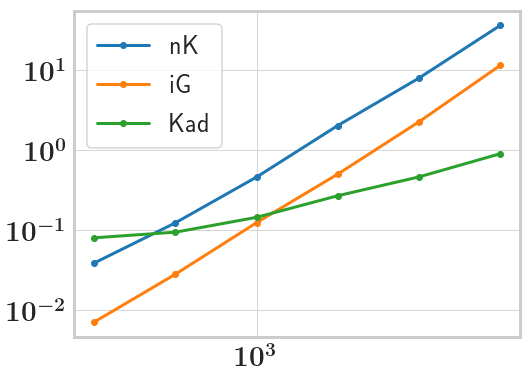

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(N_values, mean_times, '-o')
ax.legend(labels=['nK', 'iG', 'Kad'])
plt.show()

In [4]:
def updated_attack_netKit(graph, attack, out=None, random_state=0):
    
    ## Set random seed for reproducibility
    netKit.setSeed(0, True)

    ## Create a copy of graph so as not to modify the original
    g = graph.copy()

    ## Save original index as a vertex property
    N0 = g.vcount()
    g.vs['name'] = range(N0)
    
    ## List with the node original indices in removal order
    original_indices = []

    j = 0
    if out:
        if os.path.isfile(out) and os.path.getsize(out) > 0: 
            oi_values = np.loadtxt(out, dtype='int', comments='\x00')
            g.delete_vertices(oi_values)
            oi_values = np.array(oi_values) ## In case oi_values is one single integer
            j += len(oi_values)
            np.savetxt(out, oi_values, fmt='%d')

        f = open(out, 'a+')

    while j < N0:

        ## Identify node to be removed
        kadabra = netKit.centrality.KadabraBetweenness(g, k=1)
        kadabra.run()
        idx = kadabra.ranking()[0]

        ## Add index to list
        original_idx = g.vs[idx]['name']
        original_indices.append(original_idx)

        ## Remove node
        g.vs[idx].delete()     

        j += 1
            
        if out:
            f.write('{:d}\n'.format(original_idx))
            f.flush()
        
    if out:
        f.close()

    return original_indices

def updated_attack(graph, attack, out=None, random_state=0):
    
    ## Set random seed for reproducibility
    np.random.seed(random_state)

    ## Create a copy of graph so as not to modify the original
    g = graph.copy()

    ## Save original index as a vertex property
    N0 = g.vcount()
    g.vs['name'] = range(N0)
    
    ## List with the node original indices in removal order
    original_indices = []

    j = 0
    if out:
        if os.path.isfile(out) and os.path.getsize(out) > 0: 
            oi_values = np.loadtxt(out, dtype='int', comments='\x00')
            g.delete_vertices(oi_values)
            oi_values = np.array(oi_values) ## In case oi_values is one single integer
            j += len(oi_values)
            np.savetxt(out, oi_values, fmt='%d')

    while j < N0:

        ## Identify node to be removed
        if attack == 'BtwU':
            c_values = g.betweenness(directed=False, nobigint=False)
        elif attack == 'DegU':
            c_values = g.degree()
        idx = np.argmax(c_values)

        ## Add index to list
        original_idx = g.vs[idx]['name']
        original_indices.append([original_idx, c_values[idx]])

        ## Remove node
        g.vs[idx].delete()     

        j += 1
        
    return original_indices

In [2]:
file_name = '../networks/ER/ER_k5.00/ER_k5.00_N250/ER_k5.00_N250_00000/ER_k5.00_N250_00000.txt'

In [5]:
ig_g = ig.Graph().Read_Edgelist(file_name, directed=False)
oi_list_ig = updated_attack(ig_g, 'BtwU')
oi_list_ig[:10]

[[60, 1286.5421859901087],
 [169, 1052.8678094755335],
 [30, 859.8972852150715],
 [226, 931.3176781674011],
 [71, 881.8472056980787],
 [55, 894.7322790082337],
 [147, 875.0861532717353],
 [89, 903.3500279165684],
 [102, 921.2496377712639],
 [152, 928.6097604507205]]

In [ ]:
g = netKit.readGraph(file_name, fileformat=netKit.Format.EdgeListSpaceZero, directed=False)
btw = netKit.centrality.Betweenness(g)
btw.run()
btw.scores()

In [14]:
g = netKit.readGraph(file_name, fileformat=netKit.Format.EdgeListSpaceZero, directed=False)
oi_list_netKit = []
for i in range(250):
    
    netKit.setSeed(0, True)
    btw = netKit.centrality.Betweenness(g)
    btw.run()

    kadabra = netKit.centrality.KadabraBetweenness(g, k=2)
    kadabra.run()
    topNodeKad = kadabra.ranking()[0][0]
    secNodeKad = kadabra.ranking()[1][0]
    print(g.numberOfNodes(), topNodeKad, secNodeKad, btw.scores()[topNodeKad],btw.scores()[topNodeKad],  topNodeKad in g.nodes(), btw.ranking()[0:2])
    g.removeNode(topNodeKad)
    oi_list_netKit.append(topNodeKad)
    
    input()
    
oi_list_netKit[:10]

250 60 169 2573.084372744835 2573.084372744835 True [(60, 2573.084372744835), (147, 1986.2455521096158)]


249 169 100 2105.735619714369 2105.735619714369 True [(169, 2105.735619714369), (30, 1699.2752025528048)]


248 100 226 1640.7082970018505 1640.7082970018505 True [(30, 1719.794571065437), (71, 1709.0575624859002)]


247 30 71 1774.7139206842533 1774.7139206842533 True [(30, 1774.7139206842533), (71, 1739.752972313794)]


246 71 89 1772.5939665651092 1772.5939665651092 True [(71, 1772.5939665651092), (55, 1762.7968240664727)]


245 152 91 1696.1397822164827 1696.1397822164827 True [(55, 1800.8355996798846), (152, 1696.1397822164827)]


KeyboardInterrupt: 

In [ ]:
for i in range(250):
    if oi_list_ig[i] != oi_list_netKit[i]:
        print(i, oi_list_ig[i], oi_list_netKit[i])

In [17]:
netKit.__version__

'5.0.1'

In [28]:
isinstance(h, ig.Graph)

True